## Chicago Data Analysis

#### Why Chicago ?

According to wikipedia, Chicago overall crime rate, especially the violent crime rate is higher than the US average. Furthermore, in 2016 Chicago was responsible for nearly half increase of homicides in US

In [137]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.max_columns = None
%matplotlib inline


# set neat seaborn whitegrid styles for matplotlib charts
plt.style.use('seaborn')
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [73]:
df = pd.read_csv('./data/crime_test.csv')

In [3]:
corr = df.corr()

C:\Users\LUCASA~1\AppData\Local\Temp/ipykernel_9956/729815880.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


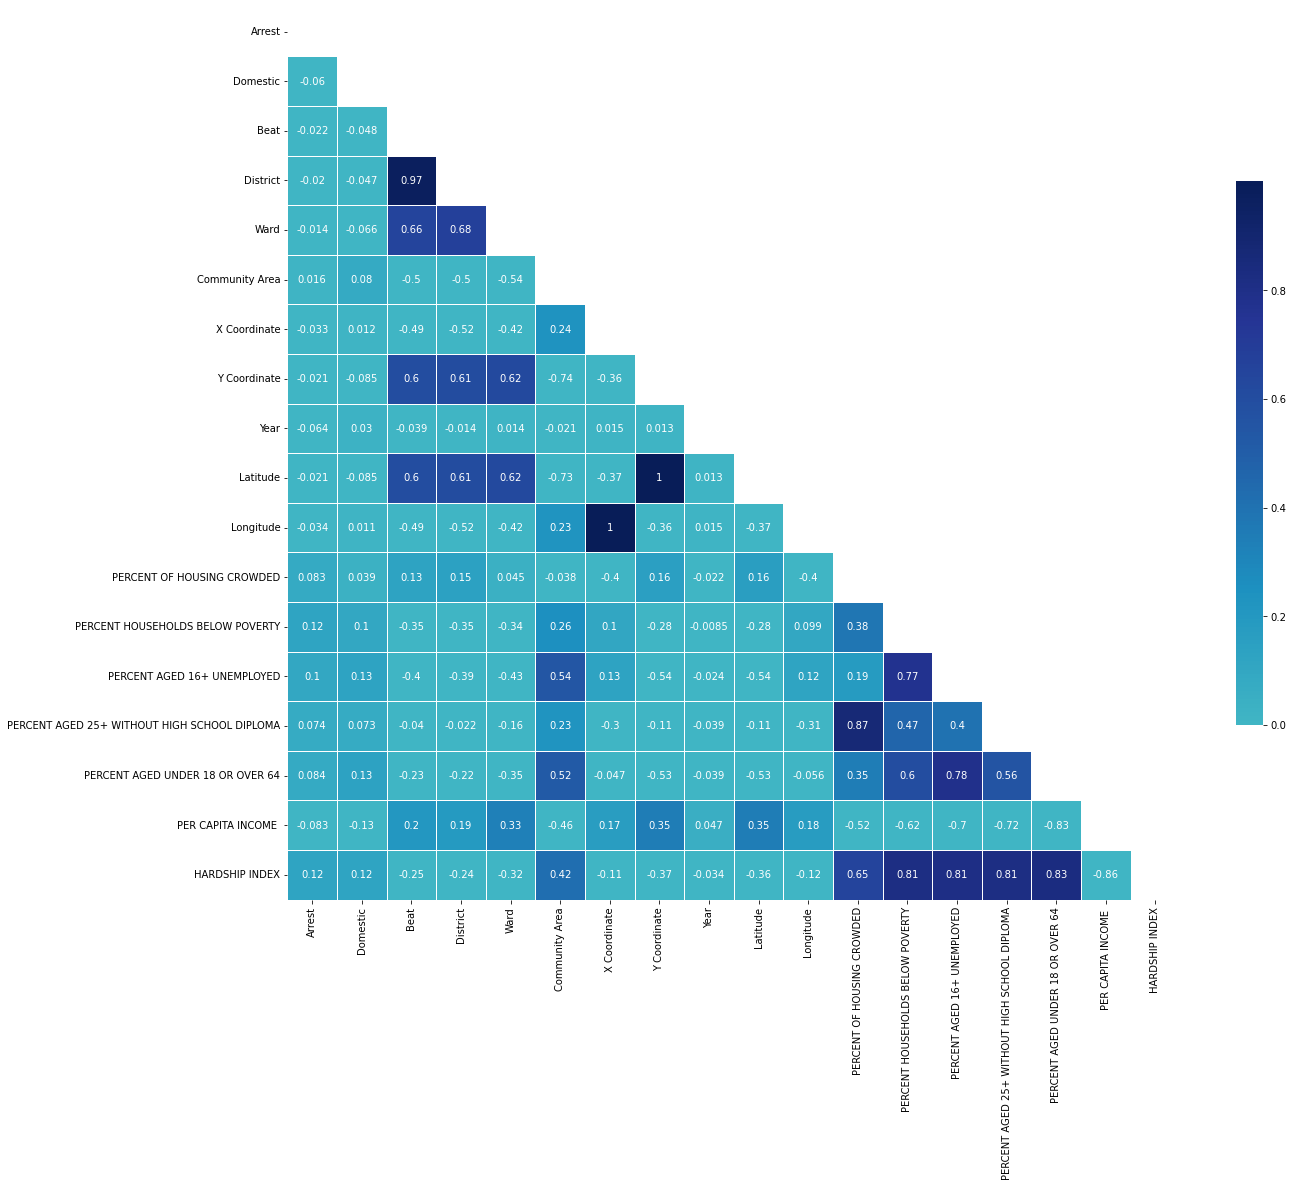

In [4]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

# Draw the heatmap with the mask and correct aspect ratio
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20));
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

#x and y coordinates can be dropped since we have latitude and longitude 

In [5]:
df.columns

Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [6]:
df_corr = df.drop(['Date','Description','Location Description','Location Description','X Coordinate','Y Coordinate','Year','Latitude','Longitude'],axis=1)

In [7]:
pd.get_dummies(df_corr,columns=['Primary Type']).corr()

,Arrest,Domestic,Beat,District,Ward,Community Area,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_HUMAN TRAFFICKING,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_NON-CRIMINAL,Primary Type_OBSCENITY,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC INDECENCY,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION
Arrest,1.000000,-0.060268,-0.022028,-0.019924,-0.014311,0.015521,0.082713,0.121212,0.100867,0.073841,0.083986,-0.083417,0.117580,-0.012238,-0.018290,-0.031288,-0.115116,0.020711,-0.018979,-0.151080,-0.005593,0.159297,-0.071988,0.069495,0.014209,-0.001793,0.097868,-0.005373,-0.009341,0.063472,-0.090443,0.534750,-0.003179,0.015076,-0.016095,-0.033983,0.128763,0.009635,0.100949,-0.074344,-0.001914,-0.004985,-0.177434,0.140406
Domestic,-0.060268,1.000000,-0.048343,-0.046836,-0.065622,0.080165,0.038742,0.099721,0.128587,0.073219,0.133500,-0.128103,0.122255,-0.010383,0.076753,0.435318,-0.099646,-0.005391,-0.000306,-0.049741,-0.001649,-0.050136,-0.088138,-0.017028,-0.009940,-0.001853,-0.024661,-0.001263,0.009852,-0.015782,-0.084333,-0.130852,-0.002164,0.001931,0.099042,0.121377,-0.031417,-0.002355,-0.030748,-0.075400,-0.005476,0.017850,-0.179809,-0.048222
Beat,-0.022028,-0.048343,1.000000,0.974579,0.655987,-0.498230,0.127077,-0.349709,-0.400351,-0.039926,-0.232805,0.204426,-0.253932,0.000888,-0.025597,-0.030996,0.003626,-0.000737,0.000590,0.004684,0.000668,-0.009453,0.016746,-0.006081,-0.007993,-0.002492,-0.005868,-0.002295,0.002467,0.011869,0.018840,-0.011770,0.002438,0.001398,-0.003140,-0.000282,0.000147,0.000163,-0.004893,-0.013493,0.005212,-0.002876,0.047004,-0.023755
District,-0.019924,-0.046836,0.974579,1.000000,0.678956,-0.495783,0.146811,-0.350612,-0.393236,-0.021600,-0.219391,0.194644,-0.238391,0.001485,-0.025002,-0.029439,0.004407,-0.000474,0.001336,0.004819,0.000832,-0.010161,0.016779,-0.006190,-0.007368,-0.002385,-0.004766,-0.002195,0.002649,0.012300,0.018370,-0.010673,0.002617,0.001385,-0.002710,-0.000550,0.001347,0.000157,-0.004360,-0.013535,0.005281,-0.002974,0.043300,-0.022340
Ward,-0.014311,-0.065622,0.655987,0.678956,1.000000,-0.538969,0.044657,-0.342266,-0.429808,-0.164927,-0.350723,0.328853,-0.322675,-0.002311,-0.031434,-0.040660,-0.012728,0.001686,0.000508,-0.012644,0.000391,-0.003612,0.043202,-0.004426,-0.009407,-0.001745,-0.006631,-0.001995,-0.000796,0.010712,-0.003375,-0.011361,0.003448,-0.000747,-0.012046,-0.009029,-0.003172,0.002352,-0.004643,-0.020507,0.002557,-0.001568,0.088017,-0.024209
Community Area,0.015521,0.080165,-0.498230,-0.495783,-0.538969,1.000000,-0.037700,0.256679,0.540386,0.228508,0.519121,-0.463803,0.416428,0.005426,0.033733,0.041347,0.022789,0.008116,-0.000478,0.021144,-0.001244,-0.001858,-0.041056,0.004385,0.010952,0.000027,0.009715,0.000543,0.002785,-0.013749,-0.002523,0.007825,-0.002103,-0.000219,0.014490,0.026001,-0.001919,-0.001524,0.007298,0.012485,-0.002625,0.000594,-0.105973,0.035449
PERCENT OF HOUSING CROWDED,0.082713,0.038742,0.127077,0.146811,0.044657,-0.037700,1.000000,0.376186,0.185369,0.871446,0.346506,-0.521464,0.650442,0.012299,0.010562,0.035591,-0.005904,-0.002371,-0.000892,0.010879,0.000829,-0.027973,-0.061933,0.012455,0.009800,-0.000341,0.010787,0.004638,0.001517,0

## Correlation between crimes and wealth

Checking if there is any relation between hardship index and crimes

<img src='https://resilient.chicago.gov/assets/img/rc/economic-hardship.png' width='70%'>

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
theft = df[df['Primary Type']=='THEFT']
sns.scatterplot(x='PERCENT HOUSEHOLDS BELOW POVERTY',y='PER CAPITA INCOME ',data=df,color='#20c4f4',ax=ax1)
sns.scatterplot(x='PERCENT AGED 16+ UNEMPLOYED',y='HARDSHIP INDEX',data=df,hue='Community Area',color='#20c4f4',ax=ax2)
sns.scatterplot(x='District',y='PER CAPITA INCOME ',data=theft,hue='District',ax=ax3)


### The map of homicides
take a look that most homicides takes place where Chicago's Hardship indexes are higher 

<img src ='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Homicides_and_Trauma_Centers_in_Chicago_.svg/1920px-Homicides_and_Trauma_Centers_in_Chicago_.svg.png' width=50%>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

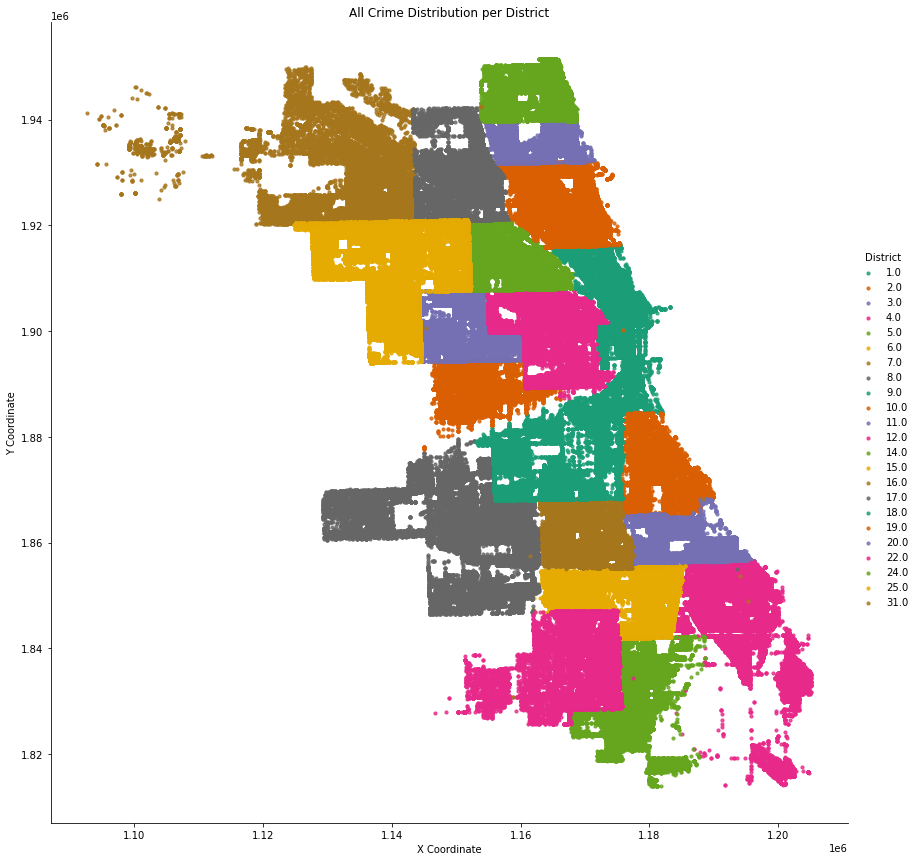

In [9]:
df_map = df.loc[(df['X Coordinate']!=0 & (df['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_map[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

#### Crimes per area

The plot below shows us a concentration of 'Theft' as one of the most occuring crimes in Chicago.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Crime Distribution')

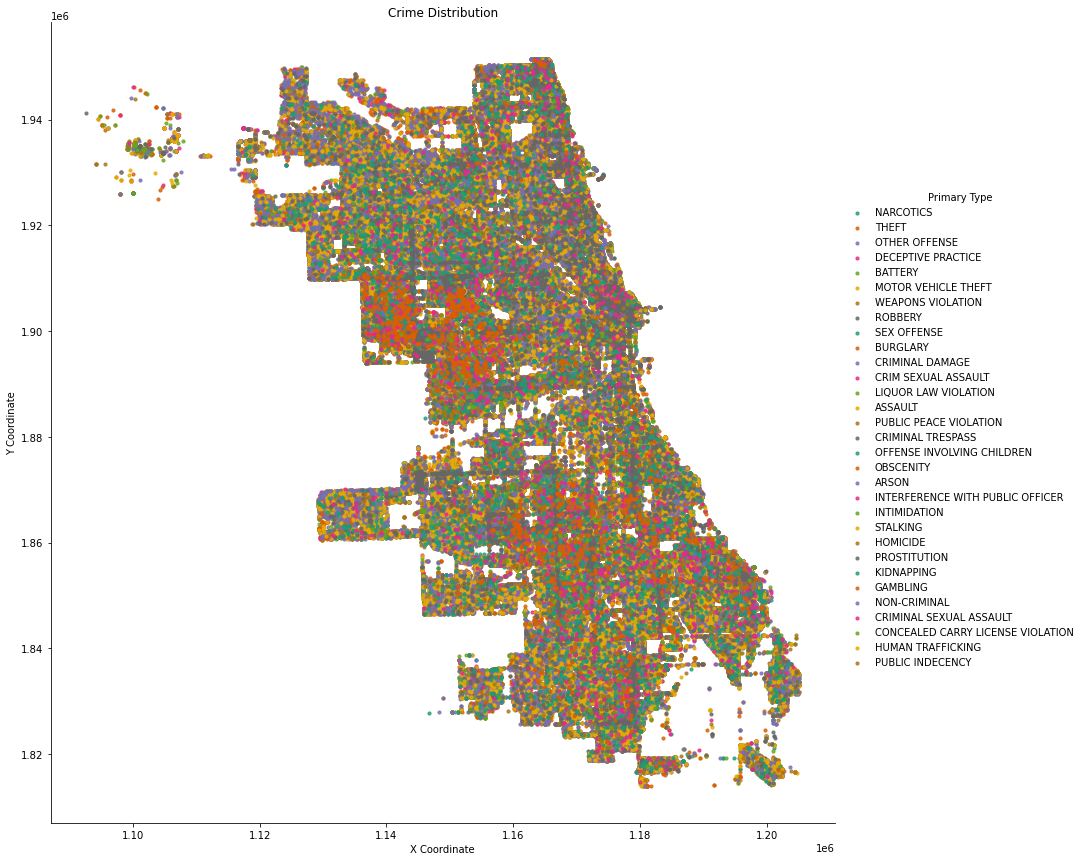

In [10]:
df_map = df.loc[(df['X Coordinate']!=0 & (df['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_map[:],
           fit_reg=False, 
           hue=df[df["Primary Type"]=='THEFT'],
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crime Distribution")

In [12]:
df.iloc[0]

Date                                                      2015-09-05 12:45:00
Primary Type                                                        NARCOTICS
Description                                             POSS: HEROIN(BRN/TAN)
Location Description                                                 SIDEWALK
Arrest                                                                   True
Domestic                                                                False
Beat                                                                     1412
District                                                                 14.0
Ward                                                                     35.0
Community Area                                                             21
X Coordinate                                                          1152037
Y Coordinate                                                          1920384
Year                                                            

In [11]:
### Crime does have a tendency to drop as the years goes by

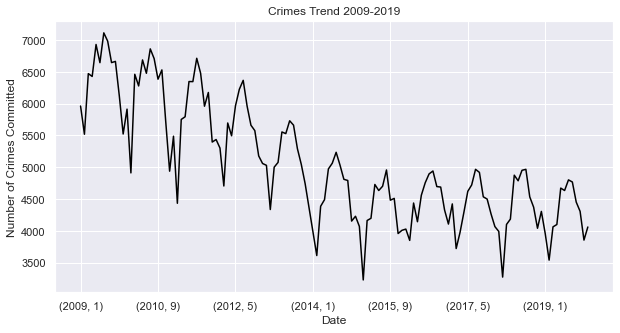

In [77]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month]).size().plot(kind='line',color = ['black'])
plt.ylabel('Number of Crimes Committed')
plt.xlabel('Date')
plt.title('Crimes Trend 2009-2019')
plt.show()

In [14]:
sns.set(rc={"figure.figsize":(10, 5)})

<AxesSubplot:xlabel='count', ylabel='Location Description'>

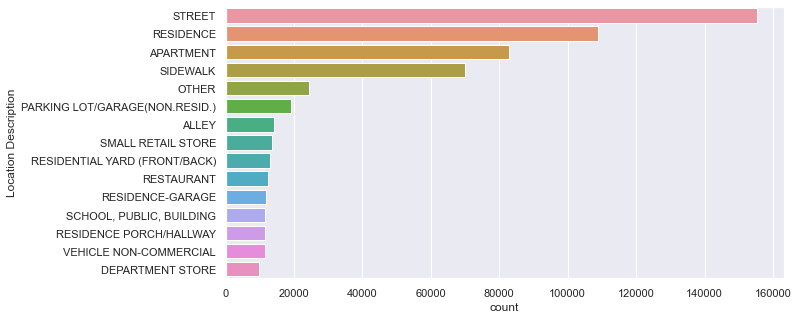

In [15]:
#Crimes by Location 
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

In [16]:
df.columns

Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [17]:
df['Primary Type'].value_counts()[:10]

THEFT                  148848
BATTERY                120576
CRIMINAL DAMAGE         72314
NARCOTICS               59505
ASSAULT                 43124
OTHER OFFENSE           40947
BURGLARY                39538
DECEPTIVE PRACTICE      32536
MOTOR VEHICLE THEFT     28904
ROBBERY                 26078
Name: Primary Type, dtype: int64

In [83]:
all_crimes =  df[['Primary Type']]

In [20]:
crime_type = all_crimes.groupby('Primary Type').size()

In [21]:
crime_type_counts = df[['Primary Type', 'Arrest', 'Domestic']].groupby('Primary Type').sum()

In [22]:
crime_type_counts['Total'] = crime_type

In [142]:
crime_type_counts['Total'].sort_values(ascending=False)

Primary Type
THEFT                                148848
BATTERY                              120576
CRIMINAL DAMAGE                       72314
NARCOTICS                             59505
ASSAULT                               43124
OTHER OFFENSE                         40947
BURGLARY                              39538
DECEPTIVE PRACTICE                    32536
MOTOR VEHICLE THEFT                   28904
ROBBERY                               26078
CRIMINAL TRESPASS                     17189
WEAPONS VIOLATION                      9042
PUBLIC PEACE VIOLATION                 5469
OFFENSE INVOLVING CHILDREN             4860
PROSTITUTION                           3756
CRIM SEXUAL ASSAULT                    2879
INTERFERENCE WITH PUBLIC OFFICER       2452
SEX OFFENSE                            2294
HOMICIDE                               1103
GAMBLING                               1096
ARSON                                   999
LIQUOR LAW VIOLATION                    955
KIDNAPPING         

In [23]:
crime_type = crime_type_counts.sort_values(by='Total',ascending=True)

In [27]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

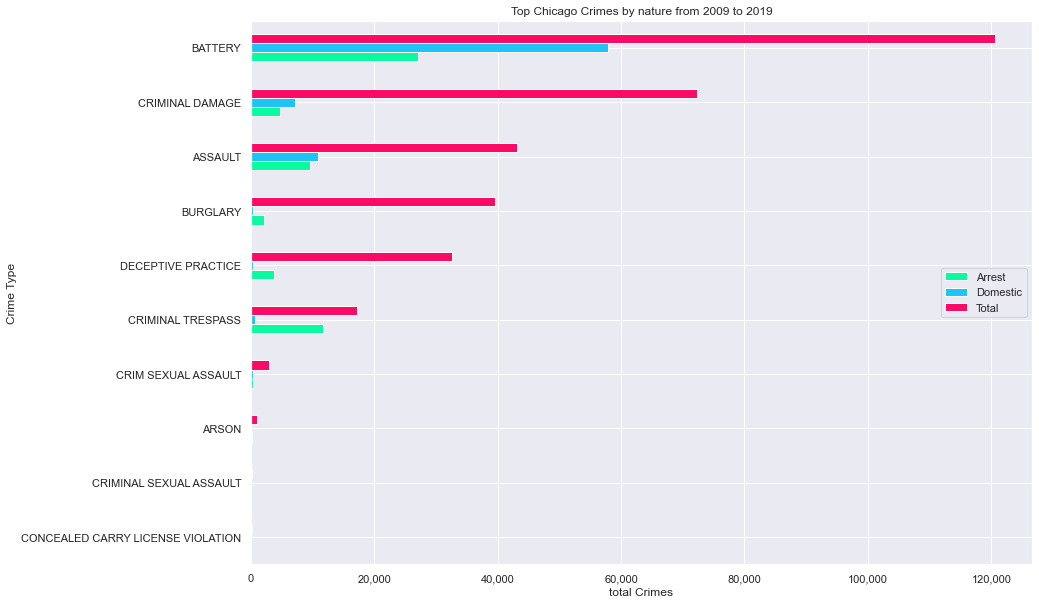

In [28]:
crime_type_counts[:10].sort_values(by='Total', ascending=True).plot(kind='barh', figsize=(14,10),color=['#0afb9f','#20c4f4','#fb0a66'])
plt.title('Top Chicago Crimes by nature from 2009 to 2019')
plt.xlabel('total Crimes')
plt.ylabel('Crime Type')
plt.legend(loc='right')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

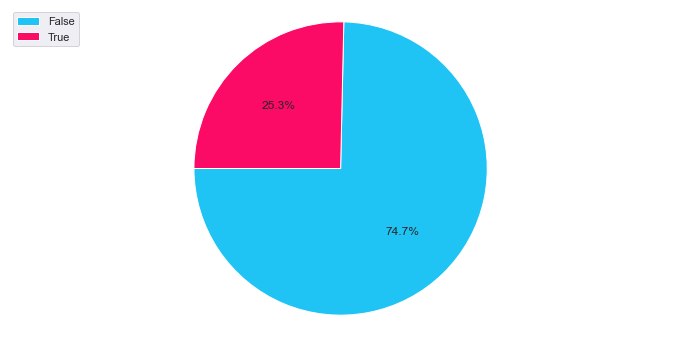

In [29]:
arrests = df['Arrest'].value_counts()
fig1, ax1 = plt.subplots()  
fig1 = plt.gcf()
fig1.set_size_inches(12, 6)
ax1.pie(arrests, labels=None, autopct="%1.1f%%", shadow=False, startangle=180,rotatelabels=True,colors=['#20c4f4','#fb0a66'])
plt.legend(arrests.index, loc='upper left')
ax1.axis("equal");


In [150]:
df.index = pd.DatetimeIndex(df.Date)
top_crime_data = df.groupby([df.index.year,df['Primary Type']]).size()

In [151]:
top_crime_data = top_crime_data.unstack()

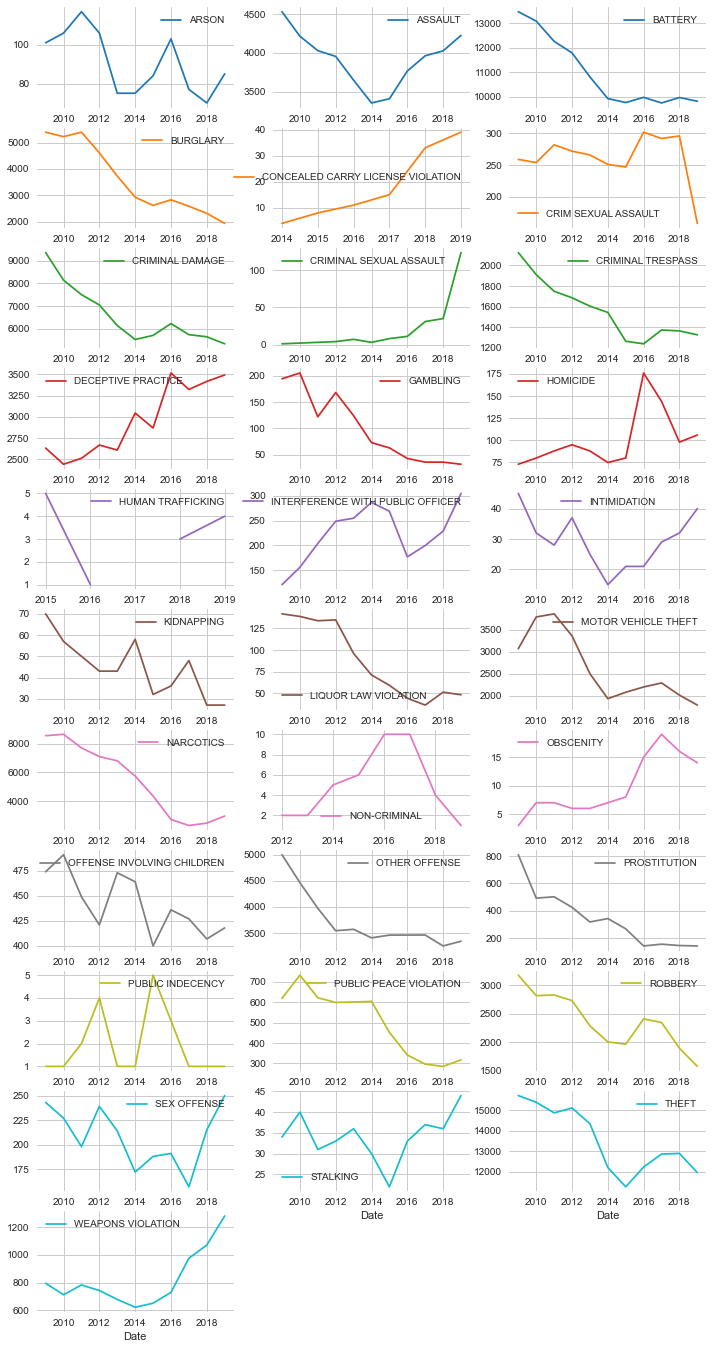

In [152]:
top_crime_data.plot(figsize=(12, 24), subplots=True, layout=(-1, 3),\
                    cmap='tab10', sharex=False, sharey=False)
plt.show()